# Anticipez les besoins en consommation de bâtiments

## Summary

* [Categorical features](#Categorical_features)
    * [DataYear (DROPPED)](#DataYear)
    * [Outlier (DROPPED)](#Outlier)
    * [BuildingType (USING)](#BuildingType)
    * [PrimaryPropertyType (USING)](#PrimaryPropertyType)
    * [PropertyName (DROPPED)](#PropertyName)
    * [Address (DROPPED)](#Address)
    * [City (DROPPED)](#City)
    * [State (DROPPED)](#State)
    * [ZipCode (DROPPED)](#ZipCode)
    * [TaxParcelIdentificationNumber (DROPPED)](#TaxParcelIdentificationNumber)
    * [CouncilDistrictCode (DROPPED)](#CouncilDistrictCode)
    * [Neighborhood (DROPPED)](#Neighborhood)
* [Quantitatives features](#Quantitative_features)
    * [Latitude & Longitude](#Latitude_&_Longitude)
    * [Correlation Matrix](#Correlation_matrix)
    * [NumberofBuildings (USING)](#NumberofBuildings)
    * [NumberofFloors (USING)](#NumberofFloors)
    * [PropertyGFATotal (USING)](#PropertyGFATotal)
    * [ENERGYSTARScore](#ENERGYSTARScore)
    * [TO PREDICT: TotalGHGEmissions (USING)](#TotalGHGEmissions)
* [Multivariate Analyses](#Multivariate_analyses)
* [Export](#Export)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from category_encoders import *

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')

In [3]:
display(data.head())
print('Data shape:', data.shape)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Data shape: (3376, 46)


In [4]:
# Removing empty columns
data = data.dropna(how='all', axis=1)

# Removing empty rows
data = data.dropna(how='all', axis=0)

print(data.shape)

(3376, 45)


In [5]:
#print(data.info())

In [6]:
data_info = pd.DataFrame({'column': data.columns,
                          'non-null count': len(data)-data.isnull().sum(),
                          'null count': data.isnull().sum(),
                          '% null': data.isnull().sum() / len(data) * 100,
                          'n-unique': data.nunique(),
                          'dtype': data.dtypes})

In [7]:
display(data_info)

,column,non-null count,null count,% null,n-unique,dtype
OSEBuildingID,OSEBuildingID,3376,0,0.000000,3376,int64
DataYear,DataYear,3376,0,0.000000,1,int64
BuildingType,BuildingType,3376,0,0.000000,8,object
PrimaryPropertyType,PrimaryPropertyType,3376,0,0.000000,24,object
PropertyName,PropertyName,3376,0,0.000000,3362,object
Address,Address,3376,0,0.000000,3354,object
City,City,3376,0,0.000000,1,object
State,State,3376,0,0.000000,1,object
ZipCode,ZipCode,3360,16,0.473934,55,float64
TaxParcelIdentificationNumber,TaxParcelIdentificationNumber,3376,0,0.000000,3268,object


## OSEBuildingID

*A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.*

* ID

In [8]:
data['OSEBuildingID'].nunique()

3376

In [9]:
data = data.drop('OSEBuildingID', axis=1)

<a name='Categorical_features'></a>
# Categorical features

## DataYear

*Calendar year (January-December) represented by each data record.*

* Only 1 category so not pertinent: only 2016

In [10]:
data['DataYear'].unique()

array([2016], dtype=int64)

In [11]:
data = data.drop('DataYear', axis=1)

In [12]:
data.shape

(3376, 43)

## Outlier

*Whether a property is a high or low outlier (Y/N)*

* Ignoring for now (deleting lines with outliers)

In [13]:
data['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [14]:
data[data['Outlier'].notnull()].head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,...,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
384,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,...,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,...,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
517,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,...,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
720,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,...,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17


In [15]:
Outlier_agg = pd.DataFrame(data['Outlier'].value_counts().sort_values(ascending=False))
Outlier_agg

,Outlier
Low outlier,23
High outlier,9


Text(0.5, 1.0, 'Outlier != NaN repartition')

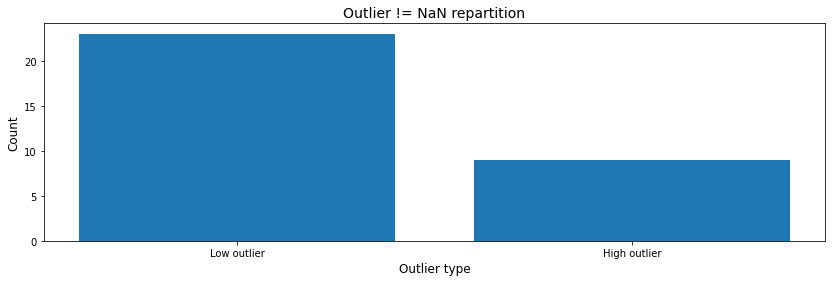

In [16]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(Outlier_agg.index, Outlier_agg['Outlier'])
ax.set_xlabel('Outlier type', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Outlier != NaN repartition', size=14)

In [17]:
data = data[data['Outlier'].isnull()]

In [18]:
data = data.drop('Outlier', axis=1)

In [19]:
data.shape

(3344, 42)

## BuildingType

*City of Seattle building type classification.*

* Nous étudions seulement les bâtiments non destinés à l'habitation, donc suppression de la data en conséquence.
* One-hot encoding

In [20]:
data['BuildingType'].nunique()

8

In [21]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [22]:
BuildingType_agg = pd.DataFrame(data['BuildingType'].value_counts().sort_values(ascending=False))
BuildingType_agg

,BuildingType
NonResidential,1445
Multifamily LR (1-4),1006
Multifamily MR (5-9),578
Multifamily HR (10+),109
SPS-District K-12,97
Nonresidential COS,84
Campus,24
Nonresidential WA,1


Text(0.5, 1.0, 'BuildingType repartition')

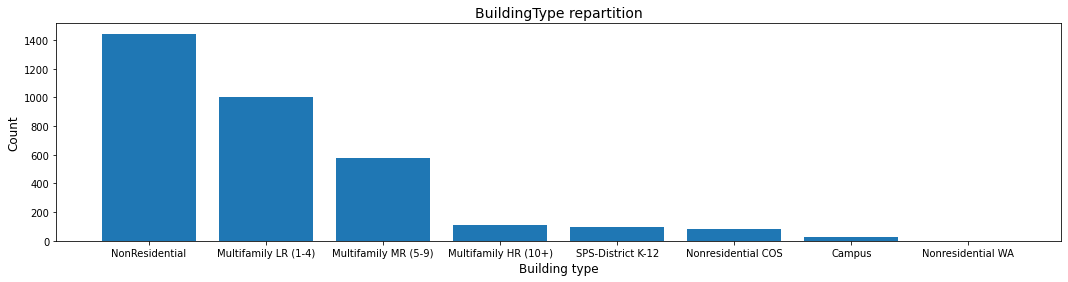

In [23]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(BuildingType_agg.index, BuildingType_agg['BuildingType'])
ax.set_xlabel('Building type', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('BuildingType repartition', size=14)

In [24]:
data = data[(data['BuildingType'] != 'Multifamily LR (1-4)')
            & (data['BuildingType'] != 'Multifamily MR (5-9)')
            & (data['BuildingType'] != 'Multifamily HR (10+)')]
data = data[data['BuildingType'] != 'Nonresidential WA'] # Only 1 line

In [25]:
BuildingType = pd.get_dummies(data['BuildingType'])
BuildingType

,Campus,NonResidential,Nonresidential COS,SPS-District K-12
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
3371,0,0,1,0
3372,0,0,1,0
3373,0,0,1,0
3374,0,0,1,0


In [26]:
BuildingType_features = BuildingType.columns.to_list()
BuildingType_features

['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12']

In [27]:
data = data.join(BuildingType)

In [28]:
data = data.drop('BuildingType', axis=1)

In [29]:
data.shape

(1650, 45)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 3375
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1650 non-null   object 
 1   PropertyName                     1650 non-null   object 
 2   Address                          1650 non-null   object 
 3   City                             1650 non-null   object 
 4   State                            1650 non-null   object 
 5   ZipCode                          1634 non-null   float64
 6   TaxParcelIdentificationNumber    1650 non-null   object 
 7   CouncilDistrictCode              1650 non-null   int64  
 8   Neighborhood                     1650 non-null   object 
 9   Latitude                         1650 non-null   float64
 10  Longitude                        1650 non-null   float64
 11  YearBuilt                        1650 non-null   int64  
 12  NumberofBuildings   

## PrimaryPropertyType

*The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.*

* One-hot encoding: improving a lot: 0.347 --> 0.422

In [31]:
data['PrimaryPropertyType'].nunique()

22

In [32]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [33]:
PrimaryPropertyType_agg = pd.DataFrame(data['PrimaryPropertyType'].value_counts().sort_values(ascending=False))
PrimaryPropertyType_agg

,PrimaryPropertyType
Small- and Mid-Sized Office,289
Other,247
Warehouse,187
Large Office,170
K-12 School,137
Mixed Use Property,114
Retail Store,89
Hotel,75
Worship Facility,69
Distribution Center,53


In [34]:
low_used_features = PrimaryPropertyType_agg[PrimaryPropertyType_agg['PrimaryPropertyType'] <= 30].index
low_used_features

Index(['Self-Storage Facility', 'University', 'Residence Hall',
       'Senior Care Community', 'Restaurant', 'Refrigerated Warehouse',
       'Hospital', 'Laboratory', 'Office', 'Low-Rise Multifamily'],
      dtype='object')

In [35]:
#data = data[data['PrimaryPropertyType'] != 'Low-Rise Multifamily'] # Deleting primarily residential building

Text(0.5, 1.0, 'PrimaryPropertyType repartition')

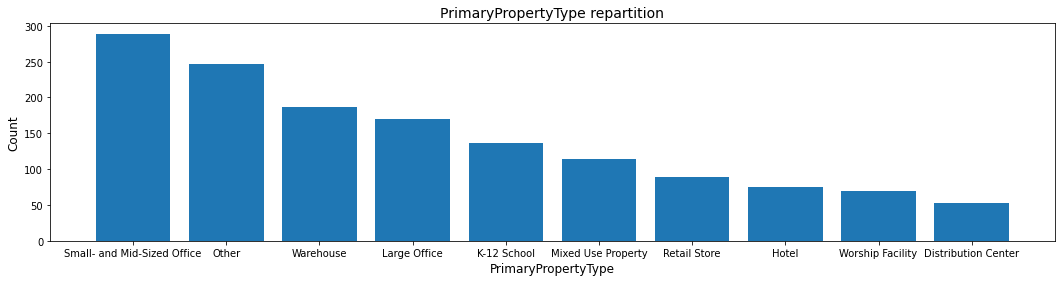

In [36]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(PrimaryPropertyType_agg[0:10].index, PrimaryPropertyType_agg['PrimaryPropertyType'][0:10])
ax.set_xlabel('PrimaryPropertyType', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('PrimaryPropertyType repartition', size=14)

In [37]:
PrimaryPropertyType = pd.get_dummies(data['PrimaryPropertyType'])
PrimaryPropertyType

,Distribution Center,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Office,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
PrimaryPropertyType = PrimaryPropertyType.drop(low_used_features, axis=1)
PrimaryPropertyType = PrimaryPropertyType.drop('Other', axis=1)

In [39]:
PrimaryPropertyType_features = PrimaryPropertyType.columns.to_list()
PrimaryPropertyType_features

['Distribution Center',
 'Hotel',
 'K-12 School',
 'Large Office',
 'Medical Office',
 'Mixed Use Property',
 'Retail Store',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Warehouse',
 'Worship Facility']

In [40]:
data = data.join(PrimaryPropertyType)

In [41]:
#data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype('category')

In [42]:
#data['PrimaryPropertyType_cat'] = data['PrimaryPropertyType'].cat.codes

In [43]:
data = data.drop('PrimaryPropertyType', axis=1)

In [44]:
data.shape

(1650, 55)

## PropertyName

*Official or common property name as entered in EPA’s Portfolio Manager.*

* Doesn't seem pertinent for now since only unique values

In [45]:
data['PropertyName'].nunique()

1646

In [46]:
data['PropertyName'].unique()

array(['Mayflower park hotel', 'Paramount Hotel',
       '5673-The Westin Seattle', ..., 'Queen Anne Pool',
       'South Park Community Center', 'Van Asselt Community Center'],
      dtype=object)

In [47]:
data = data.drop('PropertyName', axis=1)

In [48]:
data.shape

(1650, 54)

## Address

*Property street address*

* Same as *PropertyName*

In [49]:
data['Address'].nunique()

1629

In [50]:
data['Address'].unique()

array(['405 Olive way', '724 Pine street', '1900 5th Avenue', ...,
       '1920 1st Ave W', '8319 8th Ave S', '2820 S Myrtle St'],
      dtype=object)

In [51]:
data = data.drop('Address', axis=1)

In [52]:
data.shape

(1650, 53)

## City

*Property city*

* Only 1 category so not pertinent (Seattle)

In [53]:
data['City'].nunique()

1

In [54]:
data['City'].unique()

array(['Seattle'], dtype=object)

In [55]:
data = data.drop('City', axis=1)

In [56]:
data.shape

(1650, 52)

## State

*Property state*

* Only 1 category so not pertinent (WA)

In [57]:
data['State'].nunique()

1

In [58]:
data['State'].unique()

array(['WA'], dtype=object)

In [59]:
data = data.drop('State', axis=1)

In [60]:
data.shape

(1650, 51)

## ZipCode

*Property zip*

* Dropping: reduces score

In [61]:
data['ZipCode'].nunique()

48

In [62]:
data['ZipCode'].unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98013.,
       98178., 98114., 98165., 98011., 98113., 98177., 98020., 98145.,
          nan])

In [63]:
#ZipCode = pd.get_dummies(data['ZipCode'])
#ZipCode

In [64]:
#ZipCode_features = ZipCode.columns.to_list()
#ZipCode_features

In [65]:
#data = data.join(ZipCode)

In [66]:
data = data.drop(columns='ZipCode')

In [67]:
data.shape

(1650, 50)

## TaxParcelIdentificationNumber

*Property King County PIN*

* Almost only unique values so not pertinent
* Some data not unique, check later to gather more knowledge

In [68]:
data['TaxParcelIdentificationNumber'].nunique()

1570

In [69]:
data['TaxParcelIdentificationNumber'].unique()

array(['0659000030', '0659000220', '0659000475', ..., '3558300000',
       '7883603155', '7857002030'], dtype=object)

In [70]:
data = data.drop('TaxParcelIdentificationNumber', axis=1)

In [71]:
data.shape

(1650, 49)

## CouncilDistrictCode

*Property City of Seattle council district.*

* One-hot encoding: not improving results

In [72]:
data['CouncilDistrictCode'].nunique()

7

In [73]:
data['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

In [74]:
CouncilDistrictCode_agg = pd.DataFrame(data['CouncilDistrictCode'].value_counts().sort_values(ascending=False))
CouncilDistrictCode_agg

,CouncilDistrictCode
7,523
2,392
3,200
4,170
5,132
1,118
6,115


Text(0.5, 1.0, 'CouncilDistrictCode repartition')

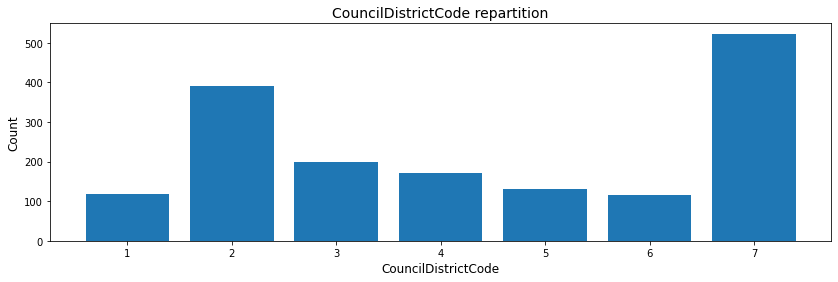

In [75]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(CouncilDistrictCode_agg.index, CouncilDistrictCode_agg['CouncilDistrictCode'])
ax.set_xlabel('CouncilDistrictCode', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('CouncilDistrictCode repartition', size=14)

In [76]:
CouncilDistrictCode = pd.get_dummies(data['CouncilDistrictCode'])
CouncilDistrictCode = CouncilDistrictCode.rename({1: 'District_1',
                                                  2: 'District_2',
                                                  3: 'District_3',
                                                  4: 'District_4',
                                                  5: 'District_5',
                                                  6: 'District_6',
                                                  7: 'District_7',}, axis=1)

In [77]:
CouncilDistrictCode

,District_1,District_2,District_3,District_4,District_5,District_6,District_7
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
3371,0,1,0,0,0,0,0
3372,0,1,0,0,0,0,0
3373,0,0,0,0,0,0,1
3374,1,0,0,0,0,0,0


In [78]:
CouncilDistrictCode_features = CouncilDistrictCode.columns.to_list()
CouncilDistrictCode_features

['District_1',
 'District_2',
 'District_3',
 'District_4',
 'District_5',
 'District_6',
 'District_7']

In [79]:
#data = data.join(CouncilDistrictCode)

In [80]:
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('category')

In [81]:
data['CouncilDistrictCode_cat'] = data['CouncilDistrictCode'].cat.codes

In [82]:
data = data.drop('CouncilDistrictCode', axis=1)

In [83]:
data.shape

(1650, 49)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 3375
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Neighborhood                     1650 non-null   object 
 1   Latitude                         1650 non-null   float64
 2   Longitude                        1650 non-null   float64
 3   YearBuilt                        1650 non-null   int64  
 4   NumberofBuildings                1648 non-null   float64
 5   NumberofFloors                   1650 non-null   int64  
 6   PropertyGFATotal                 1650 non-null   int64  
 7   PropertyGFAParking               1650 non-null   int64  
 8   PropertyGFABuilding(s)           1650 non-null   int64  
 9   ListOfAllPropertyUseTypes        1648 non-null   object 
 10  LargestPropertyUseType           1644 non-null   object 
 11  LargestPropertyUseTypeGFA        1644 non-null   float64
 12  SecondLargestPropert

## Neighborhood

*Property neighborhood area defined by the City of Seattle Department of Neighborhoods.*

* One-hot encoding: not improving results

In [85]:
data['Neighborhood'].nunique()

19

In [86]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [87]:
Neighborhood_agg = pd.DataFrame(data['Neighborhood'].value_counts().sort_values(ascending=False))
Neighborhood_agg

,Neighborhood
DOWNTOWN,356
GREATER DUWAMISH,342
MAGNOLIA / QUEEN ANNE,149
LAKE UNION,148
NORTHEAST,125
EAST,120
NORTHWEST,81
BALLARD,64
NORTH,58
CENTRAL,49


Text(0.5, 1.0, 'Neighborhood repartition')

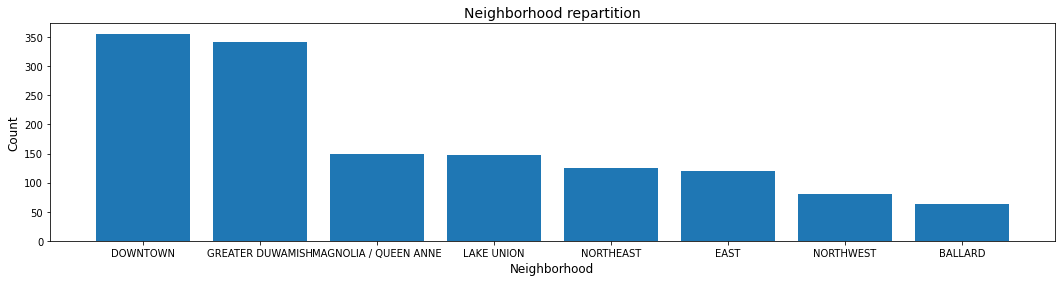

In [88]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(Neighborhood_agg[0:8].index, Neighborhood_agg['Neighborhood'][0:8])
ax.set_xlabel('Neighborhood', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Neighborhood repartition', size=14)

In [89]:
Neighborhood = pd.get_dummies(data['Neighborhood'])
Neighborhood

,BALLARD,Ballard,CENTRAL,Central,DELRIDGE,DELRIDGE NEIGHBORHOODS,DOWNTOWN,Delridge,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,North,Northwest,SOUTHEAST,SOUTHWEST
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [90]:
Neighborhood_features = Neighborhood.columns.to_list()
Neighborhood_features

['BALLARD',
 'Ballard',
 'CENTRAL',
 'Central',
 'DELRIDGE',
 'DELRIDGE NEIGHBORHOODS',
 'DOWNTOWN',
 'Delridge',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'North',
 'Northwest',
 'SOUTHEAST',
 'SOUTHWEST']

In [91]:
#data = data.join(Neighborhood)

In [92]:
data = data.drop('Neighborhood', axis=1)

In [93]:
data.shape

(1650, 48)

## YearBuilt

*Year in which a property was constructed or underwent a complete renovation.*

* Creating an ordinal feature Building_age

In [94]:
data['YearBuilt'].nunique()

113

In [95]:
data['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1998, 1928, 1922, 2004,
       1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978, 1949,
       1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973, 1920,
       1910, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1931, 1972, 1914, 1913, 1995,
       1981, 1976, 1909, 1988, 1979, 1947, 1984, 1956, 1912, 1977, 1921,
       1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918, 1905,
       1902, 1939, 1944, 1917, 1942, 1903, 2012, 2013, 1919, 1901, 1936,
       1935, 2014, 2015], dtype=int64)

Text(0.5, 1.0, 'Date de construction des bâtiments')

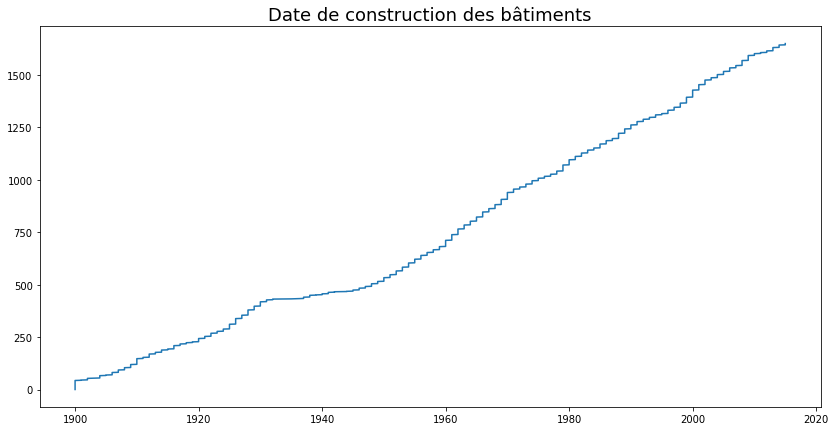

In [96]:
plt.figure(figsize=(14,7))
plt.plot(data['YearBuilt'].sort_values(ascending=True), range(len(data)), '-')
plt.title('Date de construction des bâtiments', size=18)

In [97]:
data['Building_age'] = 2016 - data['YearBuilt']

In [98]:
data['Building_age']

0       89
1       20
2       47
3       90
4       36
        ..
3371    26
3372    12
3373    42
3374    27
3375    78
Name: Building_age, Length: 1650, dtype: int64

In [99]:
data = data.drop('YearBuilt', axis=1)

In [100]:
data.shape

(1650, 48)

## ListOfAllPropertyUseTypes

*All property uses reported in Portfolio Manager*

* Need to do list aggregations like P2
* Maybe use later

In [101]:
data['ListOfAllPropertyUseTypes'].nunique()

372

In [102]:
data['ListOfAllPropertyUseTypes']

0                                                   Hotel
1                              Hotel, Parking, Restaurant
2                                                   Hotel
3                                                   Hotel
4                           Hotel, Parking, Swimming Pool
                              ...                        
3371                                               Office
3372                                   Other - Recreation
3373    Fitness Center/Health Club/Gym, Other - Recrea...
3374    Fitness Center/Health Club/Gym, Food Service, ...
3375    Fitness Center/Health Club/Gym, Food Service, ...
Name: ListOfAllPropertyUseTypes, Length: 1650, dtype: object

In [103]:
data = data.drop('ListOfAllPropertyUseTypes', axis=1)

In [104]:
data.shape

(1650, 47)

## LargestPropertyUseType

*The largest use of a property (e.g. office, retail store) by GFA.*

* Maybe use later

In [105]:
data['LargestPropertyUseType'].nunique()

56

In [106]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [107]:
LargestPropertyUseType_agg = pd.DataFrame(data['LargestPropertyUseType'].value_counts().sort_values(ascending=False))
LargestPropertyUseType_agg

,LargestPropertyUseType
Office,491
Non-Refrigerated Warehouse,199
K-12 School,137
Retail Store,97
Other,95
Hotel,75
Worship Facility,69
Distribution Center,54
Medical Office,41
Supermarket/Grocery Store,41


Text(0.5, 1.0, 'LargestPropertyUseType repartition')

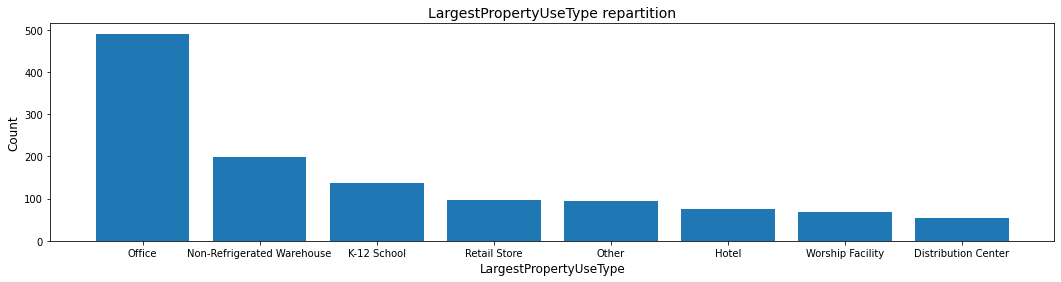

In [108]:
fig, ax = plt.subplots(figsize = (18,4))
ax.bar(LargestPropertyUseType_agg[0:8].index, LargestPropertyUseType_agg['LargestPropertyUseType'][0:8])
ax.set_xlabel('LargestPropertyUseType', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('LargestPropertyUseType repartition', size=14)

In [109]:
data = data.drop('LargestPropertyUseType', axis=1)

In [110]:
data.shape

(1650, 46)

## SecondLargestPropertyUseType

*The second largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, dropping

In [111]:
data['SecondLargestPropertyUseType'].nunique()

47

In [112]:
data['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/Gym', 'H

In [113]:
data = data.drop('SecondLargestPropertyUseType', axis=1)

In [114]:
data.shape

(1650, 45)

## ThirdLargestPropertyUseType

*The third largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, dropping

In [115]:
data['ThirdLargestPropertyUseType'].nunique()

39

In [116]:
data['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'K-12 School', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant',
       'Worship Facility', 'Supermarket/Grocery Store', 'Strip Mall',
       'Vocational School'], dtype=object)

In [117]:
data = data.drop('ThirdLargestPropertyUseType', axis=1)

In [118]:
data.shape

(1650, 44)

## DefaultData

*The property used default data for at least one property characteristic.*

* Ignoring for now, so dropping

In [119]:
data['DefaultData'].nunique()

2

In [120]:
data['DefaultData'].unique()

array([False,  True])

In [121]:
data['DefaultData'].value_counts()

False    1564
True       86
Name: DefaultData, dtype: int64

In [122]:
data = data.drop('DefaultData', axis=1)

In [123]:
data.shape

(1650, 43)

## ComplianceStatus

*Whether a property has met energy benchmarking requirements for the current reporting year.*

* Ignoring for now

In [124]:
data['ComplianceStatus'].nunique()

4

In [125]:
data['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [126]:
data['ComplianceStatus'].value_counts()

Compliant                       1547
Error - Correct Default Data      86
Missing Data                      14
Non-Compliant                      3
Name: ComplianceStatus, dtype: int64

In [127]:
data = data.drop('ComplianceStatus', axis=1)

In [128]:
data.shape

(1650, 42)

<a name='Quantitative_features'></a>
# Quantitative features

<a name='Latitude_&_Longitude'></a>
## Latitude & Longitude

*Property latitude.*

*Property longitude.*

* What to do with coordinates?
* Maybe use later

<AxesSubplot: >

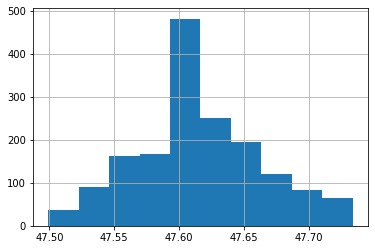

In [129]:
data['Latitude'].hist()

<AxesSubplot: >

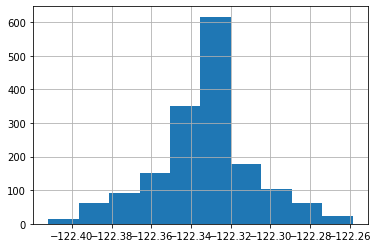

In [130]:
data['Longitude'].hist()

In [131]:
#data = data.drop(['Latitude',
#                  'Longitude'], axis=1)

In [132]:
data.shape

(1650, 42)

<a name='Correlation_matrix'></a>
## *Correlation Matrix*

In [133]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [134]:
numeric_cols

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Building_age']

In [135]:
corrMatrix = data[numeric_cols].corr(method='spearman')

In [136]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_age
Latitude,1.000000,-0.139385,0.019020,0.146212,-0.003448,0.132914,-0.034982,0.000048,0.036345,-0.084195,0.035860,0.122881,0.113628,0.120529,0.113355,0.062143,0.054590,-0.049615,0.052685,0.052685,0.061149,0.061149,0.061884,0.068501,-0.088657
Longitude,-0.139385,1.000000,0.055608,-0.116559,-0.067997,-0.116572,-0.059757,-0.039360,-0.096765,0.058820,-0.044459,-0.030874,-0.032940,-0.051264,-0.054597,-0.049252,-0.052485,-0.024099,-0.059654,-0.059654,0.025413,0.025413,-0.024608,0.024059,-0.005605
NumberofBuildings,0.019020,0.055608,1.000000,-0.038056,0.059937,-0.018305,0.059229,0.081373,0.003972,0.056851,0.008414,0.021826,0.015806,0.006571,0.000086,0.056456,0.048874,0.031570,0.044563,0.044563,0.041687,0.041687,0.064029,0.045563,-0.040476
NumberofFloors,0.146212,-0.116559,-0.038056,1.000000,0.503018,0.440646,0.467881,0.443663,0.513403,0.332553,0.146639,0.178258,0.143131,0.255194,0.236217,0.431603,0.412386,0.257464,0.474318,0.474318,-0.054180,-0.054180,0.279092,-0.078639,-0.086045
PropertyGFATotal,-0.003448,-0.067997,0.059937,0.503018,1.000000,0.423191,0.978723,0.925008,0.690609,0.543064,0.146562,0.150292,0.116289,0.217313,0.193847,0.721719,0.703447,0.203502,0.732900,0.732900,0.190845,0.190845,0.566355,-0.051232,-0.284414
PropertyGFAParking,0.132914,-0.116572,-0.018305,0.440646,0.423191,1.000000,0.282948,0.331473,0.456931,0.251986,0.036894,0.198991,0.173782,0.275825,0.260123,0.353380,0.337867,0.041241,0.396785,0.396785,-0.029278,-0.029278,0.198377,-0.138292,-0.362132
PropertyGFABuilding(s),-0.034982,-0.059757,0.059229,0.467881,0.978723,0.282948,1.000000,0.922499,0.649883,0.533255,0.153037,0.116895,0.084704,0.174645,0.152688,0.703057,0.686206,0.213315,0.706058,0.706058,0.204173,0.204173,0.567456,-0.031138,-0.231129
LargestPropertyUseTypeGFA,0.000048,-0.039360,0.081373,0.443663,0.925008,0.331473,0.922499,1.000000,0.557995,0.429341,0.177424,0.087161,0.056370,0.143464,0.121003,0.680116,0.663523,0.197494,0.682018,0.682018,0.194170,0.194170,0.550191,-0.031289,-0.289120
SecondLargestPropertyUseTypeGFA,0.036345,-0.096765,0.003972,0.513403,0.690609,0.456931,0.649883,0.557995,1.000000,0.624520,0.199481,0.075736,0.043759,0.139888,0.122287,0.535346,0.520102,0.136674,0.559876,0.559876,0.054644,0.054644,0.389040,-0.155612,-0.281213
ThirdLargestPropertyUseTypeGFA,-0.084195,0.058820,0.056851,0.332553,0.543064,0.251986,0.533255,0.429341,0.624520,1.000000,0.072125,0.058557,0.042529,0.133507,0.124175,0.458440,0.447157,0.133221,0.487682,0.487682,0.077216,0.077216,0.366343,-0.089608,-0.119970


## NumberofBuildings

*Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.*

* Deleted 1 outlier (111 buildings)
* 52 properties with 0 buildings?

In [137]:
data['NumberofBuildings'].nunique()

16

In [138]:
data['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,  nan,
         7.,   5.,   8.,  23.,  10., 111.])

In [139]:
data['NumberofBuildings'].value_counts()

1.0      1544
0.0        52
2.0        14
3.0        12
5.0         7
6.0         4
4.0         4
8.0         2
14.0        2
9.0         1
111.0       1
11.0        1
10.0        1
23.0        1
7.0         1
27.0        1
Name: NumberofBuildings, dtype: int64

<AxesSubplot: >

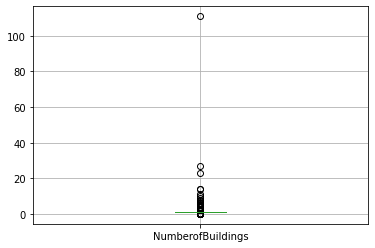

In [140]:
data.boxplot(column='NumberofBuildings')

In [141]:
data[data['NumberofBuildings'] == 111]

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,Large Office,Medical Office,Mixed Use Property,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,CouncilDistrictCode_cat,Building_age
3274,47.65644,-122.31041,111.0,0,9320156,0,9320156,9320156.0,NaN,NaN,...,0,0,0,0,0,0,0,0,3,116


In [142]:
data = data.drop(data.loc[data['NumberofBuildings'] > 20].index,  axis=0)

<AxesSubplot: >

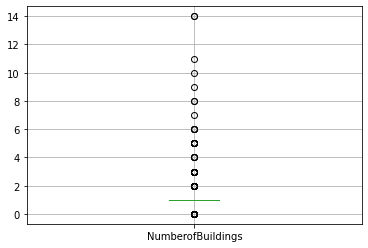

In [143]:
data.boxplot(column='NumberofBuildings')

(array([1.596e+03, 1.400e+01, 1.600e+01, 7.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

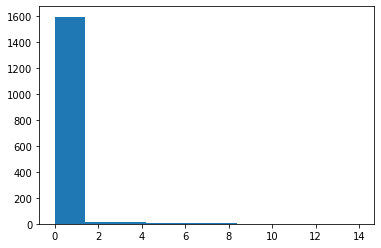

In [144]:
plt.hist(data['NumberofBuildings'])

In [145]:
#outliers_high = data[data['NumberofBuildings'] > data['NumberofBuildings'].quantile(0.975)].index

In [146]:
#outliers_high

In [147]:
#data.filter(items=outliers_high, axis=0)

In [148]:
data.shape

(1647, 42)

## NumberofFloors

*Number of floors reported in Portfolio Manager*

In [149]:
data['NumberofFloors'].nunique()

45

In [150]:
data['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99, 39], dtype=int64)

In [151]:
data['NumberofFloors'].value_counts()

1     459
2     385
3     265
4     145
5     102
6      83
7      33
8      22
10     18
11     18
0      15
12      9
14      9
9       8
13      7
15      6
42      5
19      5
17      4
24      3
33      3
29      3
25      3
22      3
23      3
20      3
18      3
21      3
16      3
34      2
36      2
41      2
47      1
76      1
63      1
56      1
55      1
49      1
39      1
46      1
37      1
30      1
28      1
27      1
99      1
Name: NumberofFloors, dtype: int64

<AxesSubplot: >

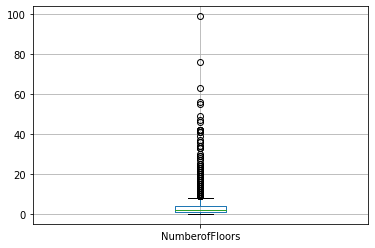

In [152]:
data.boxplot(column='NumberofFloors')

(array([1.517e+03, 8.200e+01, 2.300e+01, 1.000e+01, 1.000e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

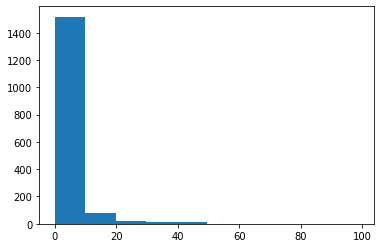

In [153]:
plt.hist(data['NumberofFloors'])

In [154]:
data.shape

(1647, 42)

## PropertyGFATotal

*Total building and parking gross floor area.*

In [155]:
data['PropertyGFATotal']

0        88434
1       103566
2       956110
3        61320
4       175580
         ...  
3371     12294
3372     16000
3373     13157
3374     14101
3375     18258
Name: PropertyGFATotal, Length: 1647, dtype: int64

<AxesSubplot: >

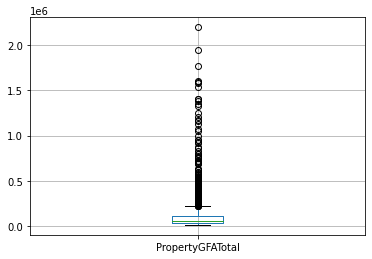

In [156]:
data.boxplot(column='PropertyGFATotal')

(array([1.452e+03, 1.260e+02, 3.000e+01, 1.500e+01, 7.000e+00, 6.000e+00,
        5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([  11285. ,  230156.5,  449028. ,  667899.5,  886771. , 1105642.5,
        1324514. , 1543385.5, 1762257. , 1981128.5, 2200000. ]),
 <BarContainer object of 10 artists>)

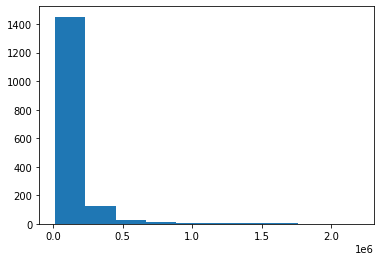

In [157]:
plt.hist(data['PropertyGFATotal'])

In [158]:
outliers_high = data[data['PropertyGFATotal'] > data['PropertyGFATotal'].quantile(0.975)].index
outliers_high

Int64Index([   2,   36,   49,   77,  124,  128,  155,  158,  166,  170,  205,
             206,  207,  212,  214,  221,  225,  227,  229,  230,  231,  233,
             261,  271,  273,  285,  292,  293,  302,  304,  307,  477,  490,
             559,  564,  577,  618, 1418, 1494, 2314, 2530, 2835],
           dtype='int64')

In [159]:
outliers_low = data[data['PropertyGFATotal'] < data['PropertyGFATotal'].quantile(0.025)].index
outliers_low

Int64Index([ 780,  859, 1027, 1030, 1106, 1132, 1134, 1162, 1191, 1244, 1472,
            1497, 1581, 1620, 1727, 1734, 1817, 2049, 2104, 2106, 2143, 2144,
            2185, 2192, 2227, 2246, 2385, 2930, 3361, 3362, 3363, 3364, 3365,
            3366, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375],
           dtype='int64')

In [160]:
data = data.drop(outliers_high)
data = data.drop(outliers_low)

In [161]:
data.shape

(1563, 42)

## PropertyGFAParking

*Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).*

* Dopping: correlated to PropertyGFATotal

In [162]:
data = data.drop('PropertyGFAParking', axis=1)

In [163]:
data.shape

(1563, 41)

## PropertyGFABuilding(s)

*Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.*

* Dropping: correlated to PropertyGFATotal

In [164]:
data = data.drop('PropertyGFABuilding(s)', axis=1)

In [165]:
data.shape

(1563, 40)

## LargestPropertyUseTypeGFA

*The gross floor area (GFA) of the largest use of the property.*

* Dropping: correlated to PropertyGFATotal

In [166]:
data = data.drop('LargestPropertyUseTypeGFA', axis=1)

In [167]:
data.shape

(1563, 39)

## SiteEnergyUse(kBtu)

*The annual amount of energy consumed by the property from all sources of energy.*

* Dropping: correlated to PropertyGFATotal

In [168]:
data['SiteEnergyUse(kBtu)']

0        7226362.50
1        8387933.00
3        6794584.00
4       14172606.00
5       12086616.00
           ...     
3340     2925780.00
3347     1325972.75
3356    39364116.00
3360      636965.50
3367     5976246.00
Name: SiteEnergyUse(kBtu), Length: 1563, dtype: float64

In [169]:
data = data.drop('SiteEnergyUse(kBtu)', axis=1)

In [170]:
data.shape

(1563, 38)

## SiteEnergyUseWN(kBtu)

*The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.*

* Feature to predict

In [171]:
data[data['SiteEnergyUseWN(kBtu)'].isnull() == True]

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),...,Large Office,Medical Office,Mixed Use Property,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,CouncilDistrictCode_cat,Building_age
563,47.61051,-122.34439,1.0,7,131143,10853.0,NaN,NaN,93.0,39.5,...,1,0,0,0,0,0,0,0,6,37
578,47.60380,-122.33293,NaN,4,63150,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,6,92
2670,47.66182,-122.31345,NaN,2,20760,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,3,88


In [172]:
data['SiteEnergyUseWN(kBtu)']

0       7.456910e+06
1       8.664479e+06
3       6.946800e+06
4       1.465650e+07
5       1.258171e+07
            ...     
3340    3.198858e+06
3347    1.397742e+06
3356    4.107860e+07
3360    6.369655e+05
3367    6.716330e+06
Name: SiteEnergyUseWN(kBtu), Length: 1563, dtype: float64

(array([1.536e+03, 1.600e+01, 4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 4.71613856e+07, 9.43227712e+07, 1.41484157e+08,
        1.88645542e+08, 2.35806928e+08, 2.82968314e+08, 3.30129699e+08,
        3.77291085e+08, 4.24452470e+08, 4.71613856e+08]),
 <BarContainer object of 10 artists>)

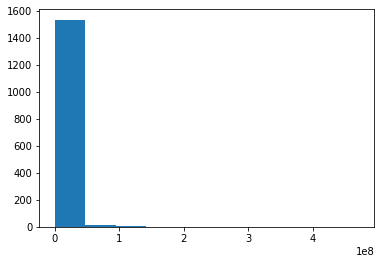

In [173]:
plt.hist(data['SiteEnergyUseWN(kBtu)'])

In [174]:
outliers_high = data[data['SiteEnergyUseWN(kBtu)'] > data['SiteEnergyUseWN(kBtu)'].quantile(0.975)].index
outliers_high

Int64Index([  20,   21,   35,   59,   72,   98,  119,  162,  167,  187,  262,
             280,  308,  309,  328,  329,  340,  346,  355,  373,  429,  474,
             488,  550,  558,  570,  601, 1672, 1690, 2325, 3156, 3158, 3182,
            3187, 3203, 3205, 3261, 3264, 3356],
           dtype='int64')

In [175]:
outliers_low = data[data['SiteEnergyUseWN(kBtu)'] < data['SiteEnergyUseWN(kBtu)'].quantile(0.025)].index
outliers_low

Int64Index([  28,   31,   62,   81,   85,   95,  133,  139,  152,  220,  247,
             284,  350,  595,  614,  630,  746,  882,  953,  974, 1263, 1361,
            1568, 1576, 1577, 1658, 1766, 1894, 1994, 2105, 2145, 2199, 2205,
            2332, 2926, 3009, 3166, 3275, 3277],
           dtype='int64')

In [176]:
data = data.drop(outliers_high)
data = data.drop(outliers_low)

In [177]:
data.shape

(1485, 38)

In [178]:
data = data[~data['SiteEnergyUseWN(kBtu)'].isnull()]

In [179]:
data.shape

(1482, 38)

(array([894., 258., 134.,  60.,  59.,  30.,  17.,  16.,   8.,   6.]),
 array([  227509.5 ,  3679371.35,  7131233.2 , 10583095.05, 14034956.9 ,
        17486818.75, 20938680.6 , 24390542.45, 27842404.3 , 31294266.15,
        34746128.  ]),
 <BarContainer object of 10 artists>)

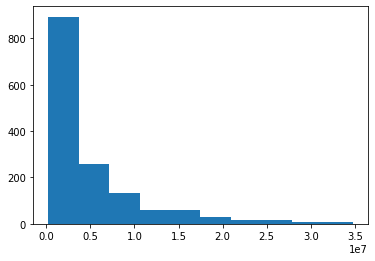

In [180]:
plt.hist(data['SiteEnergyUseWN(kBtu)'])

## SecondLargestPropertyUseTypeGFA

*The gross floor area (GFA) of the second largest use of the property.*

* Full useless, maybe use later

In [181]:
data = data.drop('SecondLargestPropertyUseTypeGFA', axis=1)

In [182]:
data.shape

(1482, 37)

## ThirdLargestPropertyUseTypeGFA

*The third largest use of a property (e.g. office, retail store) by GFA.*

* Full useless, maybe use later

In [183]:
data = data.drop('ThirdLargestPropertyUseTypeGFA', axis=1)

In [184]:
data.shape

(1482, 36)

## SiteEUIWN(kBtu/sf)

*Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [185]:
data = data.drop('SiteEUIWN(kBtu/sf)', axis=1)

In [186]:
data.shape

(1482, 35)

## SourceEUI(kBtu/sf)

*Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [187]:
data = data.drop('SourceEUI(kBtu/sf)', axis=1)

In [188]:
data.shape

(1482, 34)

## SourceEUIWN(kBtu/sf)

*Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to SiteEUI(kBtu/sf)

In [189]:
data = data.drop('SourceEUIWN(kBtu/sf)', axis=1)

In [190]:
data.shape

(1482, 33)

## Electricity(kWh)

*The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.*

* Dropping: correlated to SiteEnergyUse(kBtu)

In [191]:
data = data.drop('Electricity(kWh)', axis=1)

In [192]:
data.shape

(1482, 32)

## Electricity(kBtu)

*The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).*

* Dropping: correlated to SiteEnergyUse(kBtu)

In [193]:
data = data.drop('Electricity(kBtu)', axis=1)

In [194]:
data.shape

(1482, 31)

## SiteEUI(kBtu/sf)

*Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.*

* Dropping: correlated to TotalGHGEmissions

In [195]:
data = data.drop('SiteEUI(kBtu/sf)', axis=1)

In [196]:
data.shape

(1482, 30)

## NaturalGas(therms)

*The annual amount of utility-supplied natural gas consumed by the property, measured in therms.*

* Dropping: correlated to TotalGHGEmissions

In [197]:
data = data.drop('NaturalGas(therms)', axis=1)

In [198]:
data.shape

(1482, 29)

## NaturalGas(kBtu)

*The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).*

* Dropping: correlated to TotalGHGEmissions

In [199]:
data = data.drop('NaturalGas(kBtu)', axis=1)

In [200]:
data.shape

(1482, 28)

## SteamUse(kBtu)

*The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).*

* Dropping: data we're not supposed to have for predictions

In [201]:
data = data.drop('SteamUse(kBtu)', axis=1)

In [202]:
data.shape

(1482, 27)

## GHGEmissionsIntensity

*Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources*

* Dropping for now: correlated to TotalGHGEmissions
* Maybe use later as a feature to predict

In [203]:
data = data.drop('GHGEmissionsIntensity', axis=1)

In [204]:
data.shape

(1482, 26)

## YearsENERGYSTARCertified

*Years the property has received ENERGY STAR certification.*

* 94% empty, dropping for now

In [205]:
data = data.drop('YearsENERGYSTARCertified', axis=1)

In [206]:
data.shape

(1482, 25)

<a name='ENERGYSTARScore'></a>
## ENERGYSTARScore

*An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.*

* Dropping for now, work on it later

In [207]:
data['ENERGYSTARScore']

0       60.0
1       61.0
3       56.0
4       75.0
5        NaN
        ... 
3339     9.0
3340     NaN
3347    77.0
3360     NaN
3367     NaN
Name: ENERGYSTARScore, Length: 1482, dtype: float64

<AxesSubplot: >

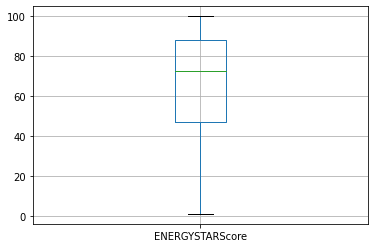

In [208]:
data.boxplot(column='ENERGYSTARScore')

(array([ 66.,  48.,  42.,  56.,  56.,  93., 106., 150., 170., 207.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

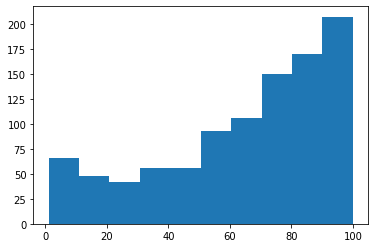

In [209]:
plt.hist(data['ENERGYSTARScore'])

In [210]:
data['ENERGYSTARScore'] = data['ENERGYSTARScore'].fillna(data['ENERGYSTARScore'].mean())

(array([ 66.,  48.,  42.,  56.,  56.,  93., 594., 150., 170., 207.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

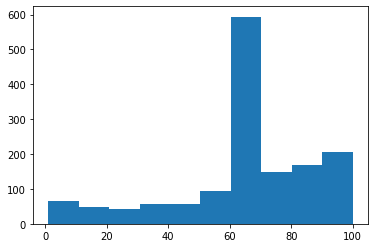

In [211]:
plt.hist(data['ENERGYSTARScore'])

In [212]:
#data = data.drop('ENERGYSTARScore', axis=1)

In [213]:
data.shape

(1482, 25)

<a name='TotalGHGEmissions'></a>
## TotalGHGEmissions (feature to predict)

*The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.*

* Removing NaN values (2 lines)

In [214]:
data['TotalGHGEmissions']

0       249.98
1       295.86
3       286.43
4       505.01
5       301.81
         ...  
3339    134.80
3340     67.65
3347      9.24
3360      4.44
3367    259.22
Name: TotalGHGEmissions, Length: 1482, dtype: float64

<AxesSubplot: >

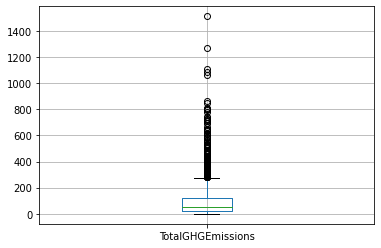

In [215]:
data.boxplot(column='TotalGHGEmissions')

(array([1.177e+03, 1.860e+02, 6.200e+01, 2.600e+01, 1.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-8.000000e-01,  1.503650e+02,  3.015300e+02,  4.526950e+02,
         6.038600e+02,  7.550250e+02,  9.061900e+02,  1.057355e+03,
         1.208520e+03,  1.359685e+03,  1.510850e+03]),
 <BarContainer object of 10 artists>)

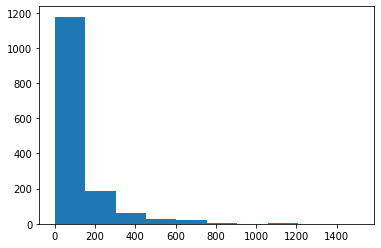

In [216]:
plt.hist(data['TotalGHGEmissions'])

In [217]:
data = data[data['TotalGHGEmissions'].notnull()]

In [218]:
data.shape

(1482, 25)

In [219]:
outliers_high = data[data['TotalGHGEmissions'] > data['TotalGHGEmissions'].quantile(0.975)].index
outliers_high

Int64Index([  10,   11,   13,   17,   47,   60,   69,   71,  121,  193,  194,
             195,  196,  211,  256,  260,  272,  334,  338,  341,  345,  366,
             426,  441,  487,  545,  561,  571,  809, 1753, 1754, 2324, 2522,
            2524, 2584, 3168, 3171, 3233],
           dtype='int64')

In [220]:
outliers_low = data[data['TotalGHGEmissions'] < data['TotalGHGEmissions'].quantile(0.025)].index
outliers_low

Int64Index([ 146,  380,  385,  513,  683,  684,  796, 1000, 1031, 1041, 1049,
            1093, 1124, 1128, 1144, 1317, 1326, 1359, 1433, 1458, 1590, 1641,
            1691, 1698, 1762, 1965, 2038, 2151, 2182, 2413, 2444, 2447, 2636,
            2912, 2916, 2919, 2929, 3206],
           dtype='int64')

In [221]:
data = data.drop(outliers_high)
data = data.drop(outliers_low)

In [222]:
data.shape

(1406, 25)

<a name='Multivariate_analyses'></a>
# Multivariate Analyses

## NumberofBuildings vs NumberofFloors

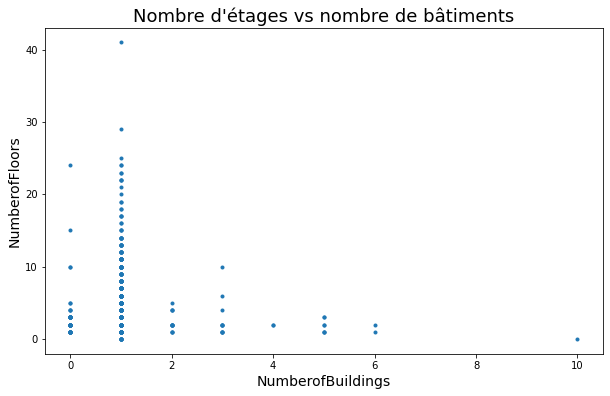

In [223]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['NumberofBuildings'], data['NumberofFloors'], '.')
ax.set_xlabel('NumberofBuildings', size=14)
ax.set_ylabel("NumberofFloors", size=14)
plt.title("Nombre d'étages vs nombre de bâtiments", size=18)
plt.show()

# Émissions vs superficie totale

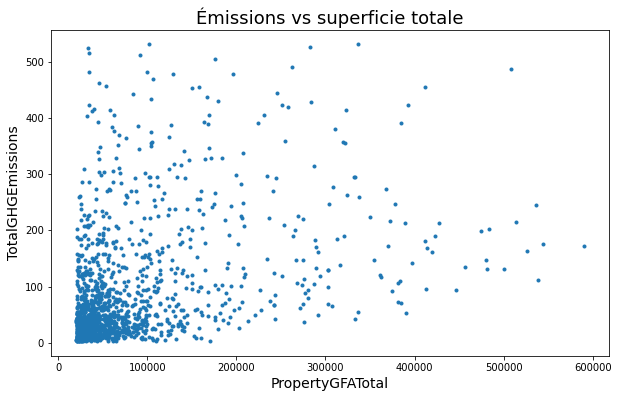

In [224]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['PropertyGFATotal'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('PropertyGFATotal', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs superficie totale", size=18)
plt.show()

# Émissions vs Nombre de bâtiments

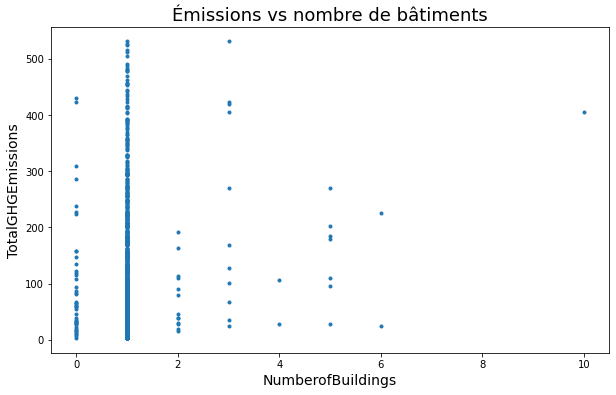

In [225]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['NumberofBuildings'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('NumberofBuildings', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs nombre de bâtiments", size=18)
plt.show()

# Émissions vs Number of floors

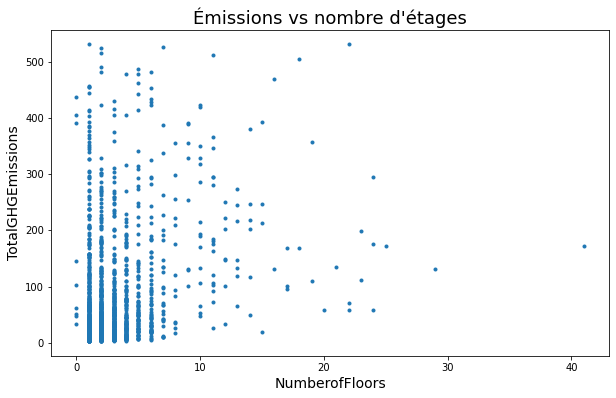

In [226]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['NumberofFloors'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('NumberofFloors', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs nombre d'étages", size=18)
plt.show()

# Émissions vs âge du bâtiment

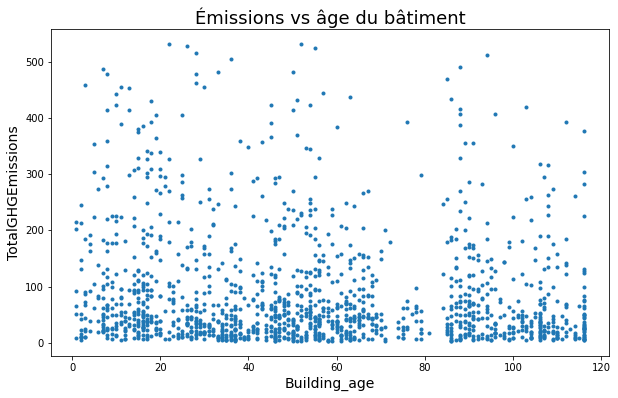

In [227]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['Building_age'], data['TotalGHGEmissions'], '.')
ax.set_xlabel('Building_age', size=14)
ax.set_ylabel("TotalGHGEmissions", size=14)
plt.title("Émissions vs âge du bâtiment", size=18)
plt.show()

# Nombre d'étages par type de bâtiment

In [228]:
'''fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['Campus'] == 1]['NumberofFloors'],
          data[data['NonResidential'] == 1]['NumberofFloors'],
          data[data['Nonresidential COS'] == 1]['NumberofFloors'],
          data[data['SPS-District K-12'] == 1]['NumberofFloors']], bins=10, label=['Campus',
                                                                                   'NonResidential',
                                                                                   'Nonresidential COS',
                                                                                   'SPS-District K-12'])
ax.legend()
plt.show()'''

"fig, ax = plt.subplots(figsize = (14,6))\nplt.hist([data[data['Campus'] == 1]['NumberofFloors'],\n          data[data['NonResidential'] == 1]['NumberofFloors'],\n          data[data['Nonresidential COS'] == 1]['NumberofFloors'],\n          data[data['SPS-District K-12'] == 1]['NumberofFloors']], bins=10, label=['Campus',\n                                                                                   'NonResidential',\n                                                                                   'Nonresidential COS',\n                                                                                   'SPS-District K-12'])\nax.legend()\nplt.show()"

# Export

In [229]:
display(data.head(1))
print(data.info())
print(data.shape)

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Campus,NonResidential,...,Large Office,Medical Office,Mixed Use Property,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,CouncilDistrictCode_cat,Building_age
0,47.6122,-122.33799,1.0,12,88434,60.0,7456910.0,249.98,0,1,...,0,0,0,0,0,0,0,0,6,89


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 3367
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     1406 non-null   float64
 1   Longitude                    1406 non-null   float64
 2   NumberofBuildings            1406 non-null   float64
 3   NumberofFloors               1406 non-null   int64  
 4   PropertyGFATotal             1406 non-null   int64  
 5   ENERGYSTARScore              1406 non-null   float64
 6   SiteEnergyUseWN(kBtu)        1406 non-null   float64
 7   TotalGHGEmissions            1406 non-null   float64
 8   Campus                       1406 non-null   uint8  
 9   NonResidential               1406 non-null   uint8  
 10  Nonresidential COS           1406 non-null   uint8  
 11  SPS-District K-12            1406 non-null   uint8  
 12  Distribution Center          1406 non-null   uint8  
 13  Hotel             

In [230]:
data.to_csv('cleaned_data.csv', sep=',', index=False)

In [231]:
corrMatrix = data.corr(method='spearman')

In [232]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                           else 'background-color : green' if (x >= 0.9) & (x != 1)
                           else '')

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,Distribution Center,Hotel,K-12 School,Large Office,Medical Office,Mixed Use Property,Retail Store,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility,CouncilDistrictCode_cat,Building_age
Latitude,1.000000,-0.129200,0.008356,0.181975,-0.006410,0.034865,0.067440,0.061233,-0.038184,0.015310,0.003569,-0.007755,-0.179898,0.053481,0.044171,0.026867,0.050200,0.020402,0.028187,0.032405,0.076412,-0.258610,0.084390,0.610616,-0.089378
Longitude,-0.129200,1.000000,0.048851,-0.121425,-0.068446,-0.027362,-0.035338,-0.001684,0.023641,-0.074190,0.007856,0.083329,0.014574,-0.045879,0.103724,-0.122935,0.103675,-0.004323,0.023601,-0.087726,-0.010996,0.031975,-0.004877,-0.376683,0.004299
NumberofBuildings,0.008356,0.048851,1.000000,-0.032276,0.017983,0.005903,0.027259,0.038588,0.214690,-0.037118,-0.052515,0.006149,0.037376,0.019117,0.039461,-0.012731,-0.016393,0.006600,-0.033240,-0.055732,-0.032271,-0.010333,-0.009450,-0.028691,-0.048111
NumberofFloors,0.181975,-0.121425,-0.032276,1.000000,0.448663,0.153464,0.349235,0.167415,-0.018528,0.156441,-0.110908,-0.105471,-0.193003,0.268069,-0.085290,0.416060,0.065422,0.002860,-0.129426,0.182079,-0.162472,-0.290464,-0.084013,0.460996,-0.040314
PropertyGFATotal,-0.006410,-0.068446,0.017983,0.448663,1.000000,0.172633,0.672539,0.458570,0.019882,-0.052998,-0.059652,0.115984,-0.009763,0.122874,0.044990,0.456912,0.039777,-0.061861,-0.032152,-0.148790,-0.025273,-0.040652,-0.178406,0.153478,-0.265386
ENERGYSTARScore,0.034865,-0.027362,0.005903,0.153464,0.172633,1.000000,-0.115549,-0.089287,-0.009486,-0.146676,-0.054190,0.250091,-0.084933,0.005738,0.229319,0.188143,-0.121308,-0.052199,0.020763,0.052583,-0.107530,-0.134411,0.004645,0.081502,-0.001729
SiteEnergyUseWN(kBtu),0.067440,-0.035338,0.027259,0.349235,0.672539,-0.115549,1.000000,0.827385,0.072979,-0.082068,0.073906,0.014774,-0.109327,0.144575,-0.019729,0.390442,0.068841,-0.028585,-0.002587,-0.149234,0.204892,-0.225850,-0.211328,0.167936,-0.250019
TotalGHGEmissions,0.061233,-0.001684,0.038588,0.167415,0.458570,-0.089287,0.827385,1.000000,0.089348,-0.146028,0.097189,0.073700,-0.078063,0.211697,0.087865,0.210348,0.012414,-0.027859,-0.022261,-0.268954,0.196371,-0.171124,-0.079763,0.094217,-0.116166
Campus,-0.038184,0.023641,0.214690,-0.018528,0.019882,-0.009486,0.072979,0.089348,1.000000,-0.278879,-0.021901,-0.025119,-0.018650,-0.021721,0.070362,-0.032416,-0.015548,0.060964,-0.024305,-0.049340,-0.016939,-0.035556,-0.021357,-0.011454,0.002974
NonResidential,0.015310,-0.074190,-0.037118,0.156441,-0.052998,-0.146676,-0.082068,-0.146028,-0.278879,1.000000,-0.607275,-0.696516,0.054450,0.077886,-0.560612,0.093339,0.040997,0.021973,0.087152,0.154366,0.060740,0.084945,0.076583,0.089109,0.094986
